<a href="https://colab.research.google.com/github/j-reyes314/Project_Examples/blob/main/Simple_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [ ]:
#read data into dataframe

url = "https://www.statlearning.com/s/Advertising.csv"
radio = pd.read_csv(url, index_col=0)
radio.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


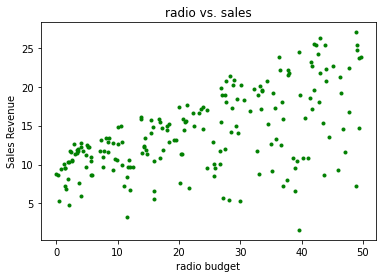

In [ ]:
#plot the data we will be working with

plt.plot(radio['radio'], radio['sales'], 'g.')
plt.title("radio vs. sales")
plt.xlabel("radio budget")
plt.ylabel("Sales Revenue")
plt.show()

In [ ]:
data = radio.loc[:, ['radio', 'sales']]
data.head()

,radio,sales
1,37.8,22.1
2,39.3,10.4
3,45.9,9.3
4,41.3,18.5
5,10.8,12.9


In [ ]:
#calculate the normal equation

x = np.hstack([np.ones([len(data), 1]), data[['radio']].values])

y = data[['sales']].values


normal = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(normal)

[[9.3116381 ]
 [0.20249578]]


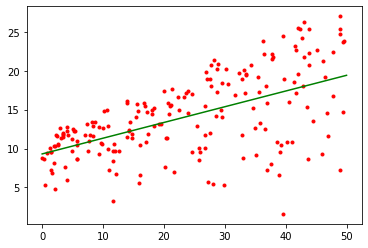

In [ ]:
#plot the models results over our previous graph

plt.plot(data['radio'], data['sales'], 'r.')
x_coordinates = np.array([0,50])
y_coordinates = x_coordinates * 0.202 + 9.31
plt.plot(x_coordinates, y_coordinates, 'g-')

In [ ]:
#Now we will use Pythons built in features for comparison to our model

model_regression = LinearRegression()
model_regression.fit(data[['radio']], data[['sales']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(model_regression.coef_)
print(model_regression.intercept_)

#Use the functions provided to calculate the coefficient and intercept, both of which match our own calculated values

[[0.20249578]]
[9.3116381]


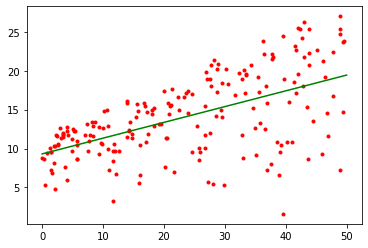

In [ ]:
#Repeat the process of graphing our data with the linear model

m = model_regression.coef_[0, 0] 
b = model_regression.intercept_[0]

plt.plot(data['radio'], data['sales'], 'r.')
x_coordinates = np.array([0,50])
y_coordinates = x_coordinates * m + b
plt.plot(x_coordinates, y_coordinates, 'g-')